In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_view=pd.read_csv('train.csv')
train_view.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data_dir='./'
X_train=train_view.values[:800,1:]
y_train=train_view.values[:800,0]

pred=pd.read_csv('test.csv')

    

In [10]:
y_train[0]+1

2

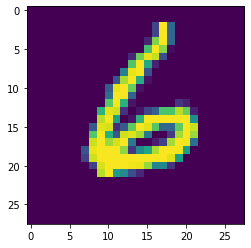

In [11]:
row=109
plt.imshow(X_train[row,:].reshape(28,28))


[193 272 111 196]
[281 584 468 371]
[112 547  16 487]
[560 610 734  36]
[148 277 541 467]
[686 328 782 167]
[374 693 179 315]
[138 786 657 321]
[765 674 176 220]
[614 323  33 384]


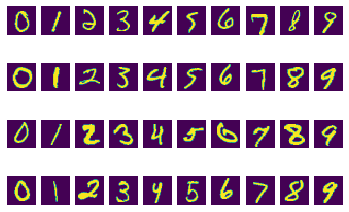

In [12]:
classes=['0','1','2','3','4','4','6','7','8','9']
row =4
for x, y in enumerate (classes):
    indexs=[i for i,label in enumerate(y_train) if label==x]   
    index_row=np.random.choice(indexs,row)
    print(index_row)
    
    for i in range(row):
        plt.subplot(row,10,i*10+x+1)
        plt.figsiez=(1,1)
        plt.imshow(X_train[index_row[i]].reshape(28,28))
        plt.axis('off')


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(640, 784) (160, 784) (640,) (160,)


5


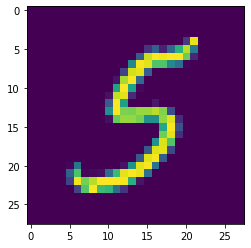

In [15]:
plt.imshow(X_test[0,:].reshape(28,28))
print(y_train[582])

vote: {3: 11, 8: 5, 2: 3, 5: 1} k is  5
my answer: 3


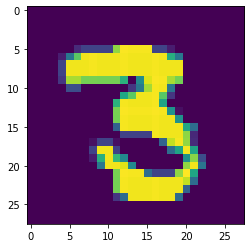

In [16]:
vote=[]
testnumber=58 #I am guessing a number


for i in X_train:
    vote.append((X_test[testnumber,:]-i)**2)
    
vote=np.array(vote)
sumvote=vote.sum(axis=1)


best_id=np.argsort(sumvote) #sort 之后，返回index
class_account={}

k=20 # input the K number


for i in range (k):
    vote=best_id[i]
    number=y_train[vote]
    class_account[number]=class_account.get(number,0)+1


max=0
ans=0
for k, v in class_account.items():
    if v>max:
        max=v
        ans=k
        
        
        
print ('vote:',class_account,'k is ',k)
print('my answer:', ans)
plt.imshow(X_test[testnumber,:].reshape(28,28))


